In [ ]:
# Air Quality

In [22]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from typing import List,Dict,Tuple
from sklearn.neighbors import KNeighborsRegressor # package for doing KNN
from sklearn.model_selection import cross_val_score
# instead of cross_val_score you can use test_train_split too

print('All packages imported successfully!')

All packages imported successfully!


In [2]:
# Read in the data
raw_data = pd.read_csv('/content/data.csv',encoding="ISO-8859-1")
raw_data = raw_data.rename(columns={'PM2_5': 'PM2.5'})
print(f"The dataset contains {len(raw_data)} entries")
raw_data.head(5)

<ipython-input-2-75f4de68099e>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/content/data.csv',encoding="ISO-8859-1")


The dataset contains 435742 entries


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
raw_data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
# Working with data on Delhi - select city/state as per your choice
selected_columns = raw_data[["stn_code","date","sampling_date","state","location", "so2", "no2","rspm","spm","pm2_5"]]
selected_columns = selected_columns[selected_columns["location"]=='Delhi']

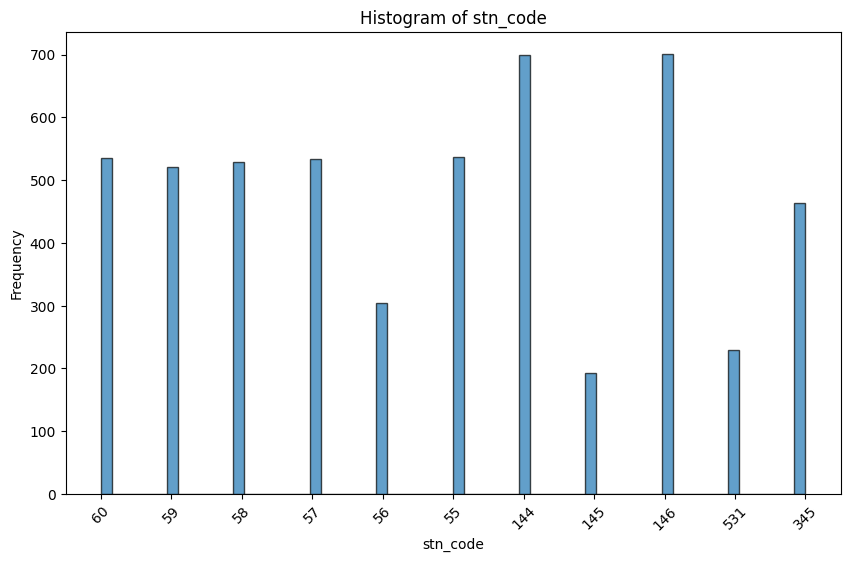

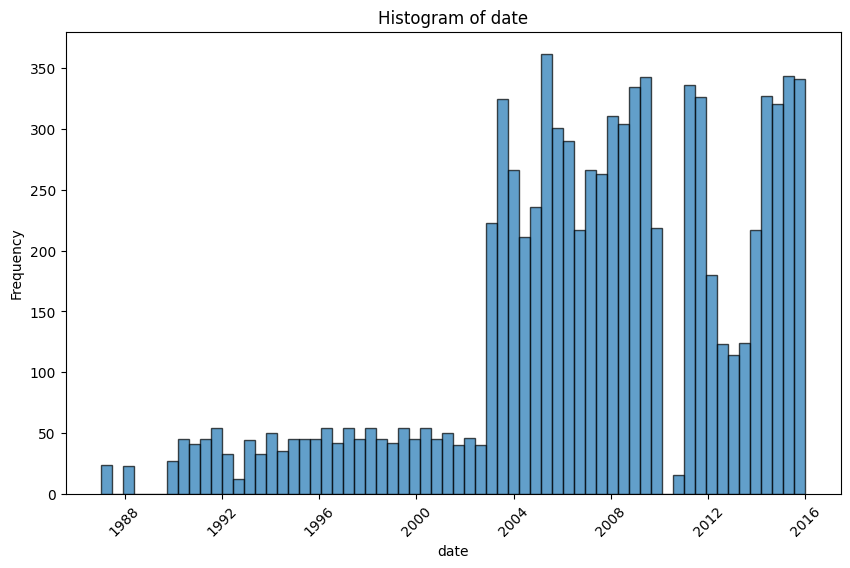

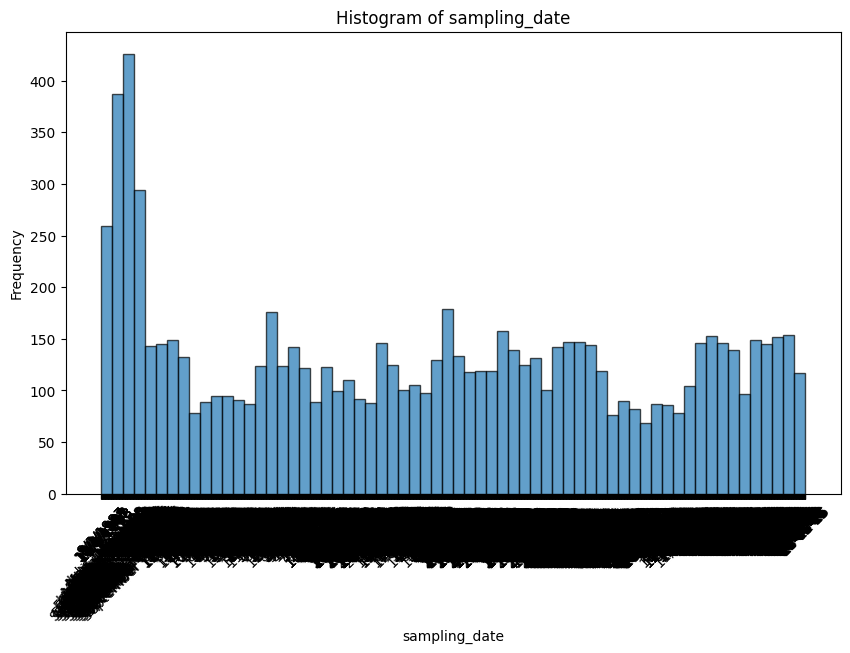

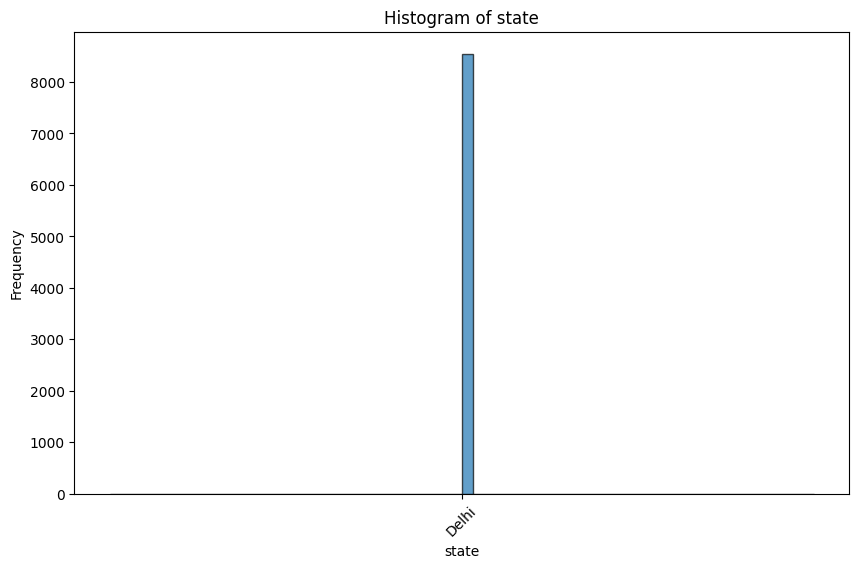

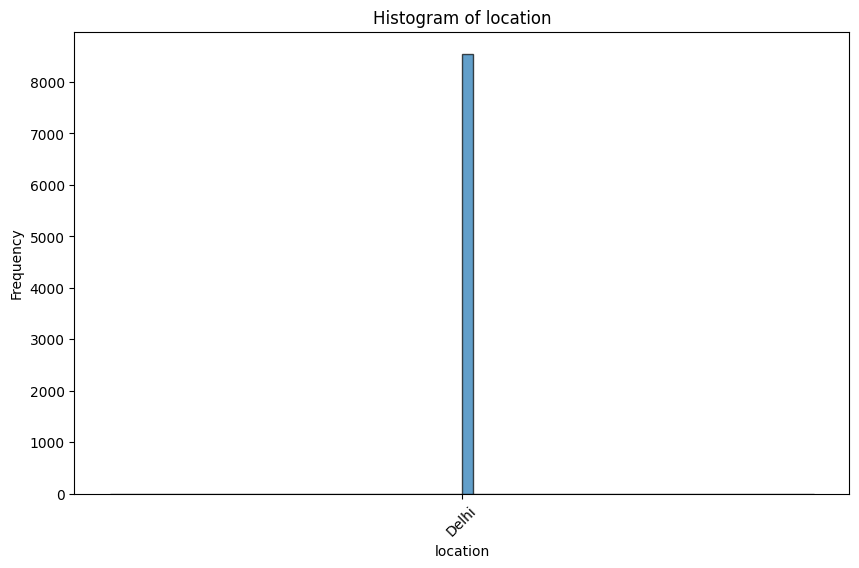

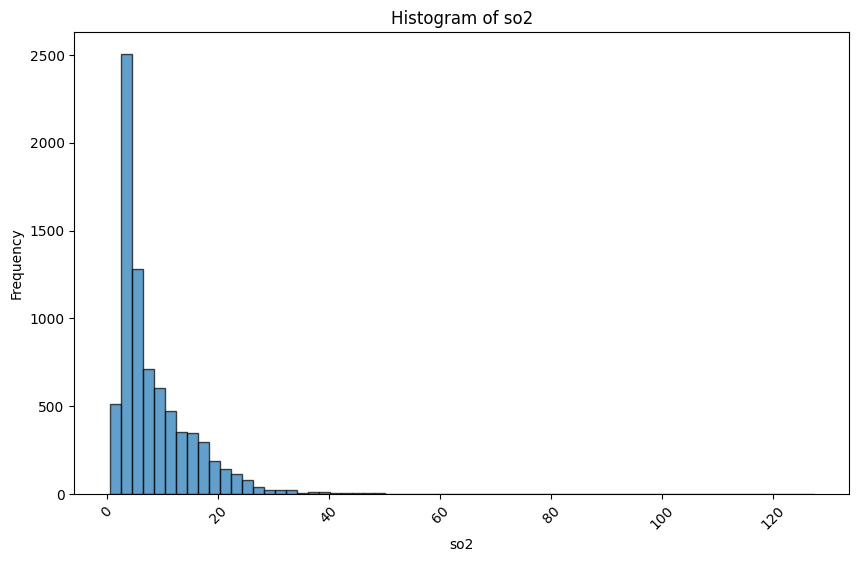

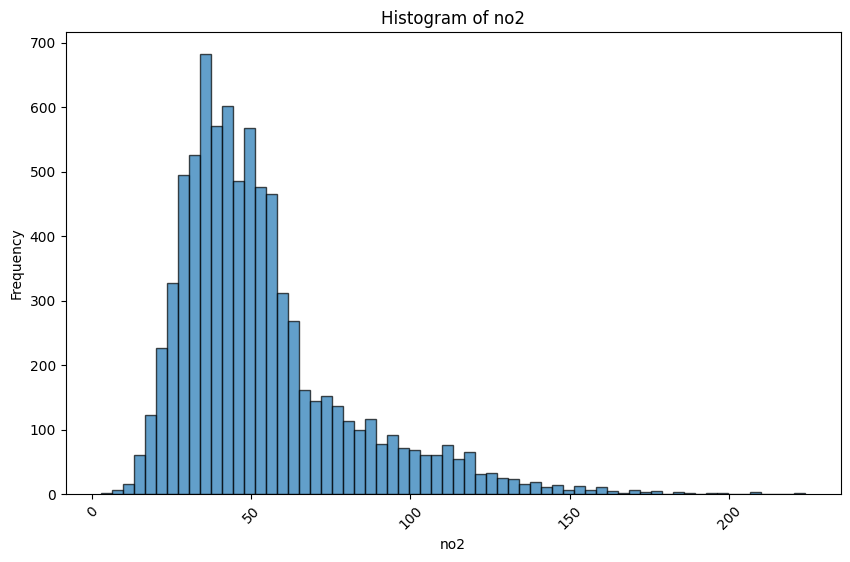

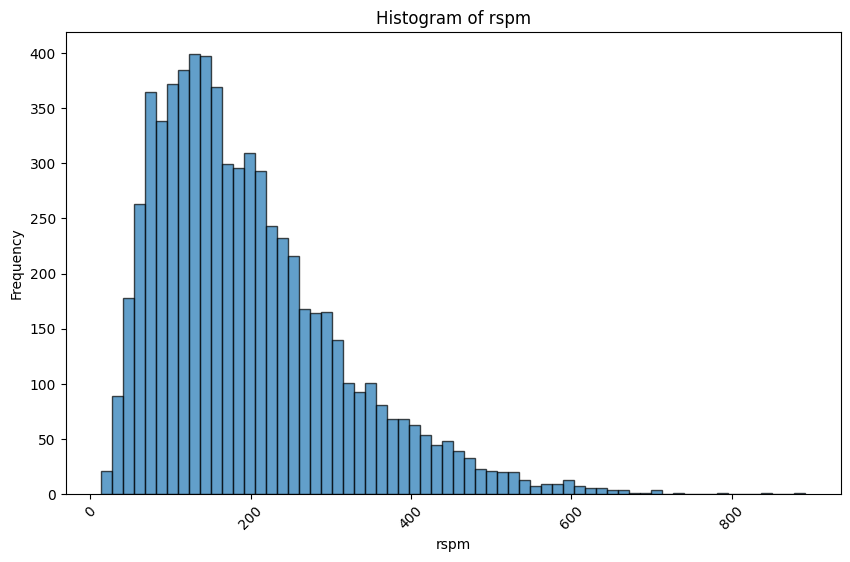

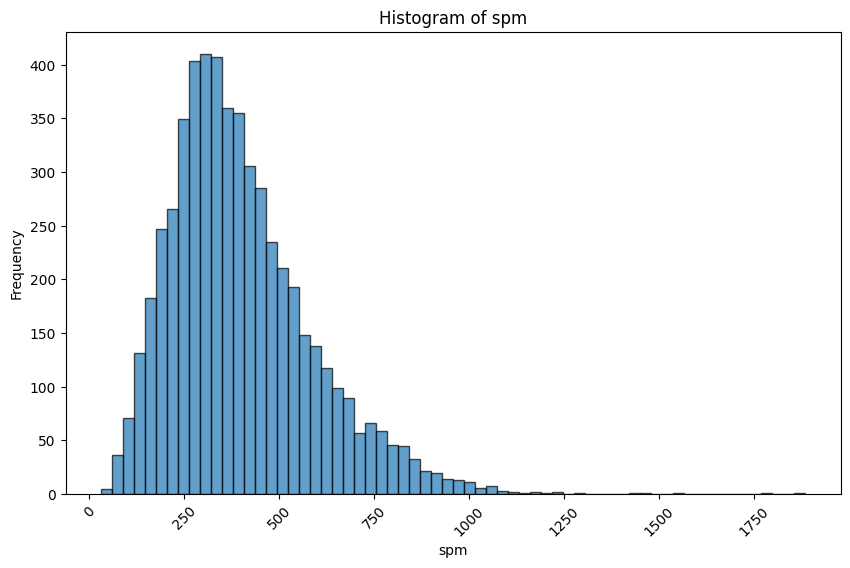

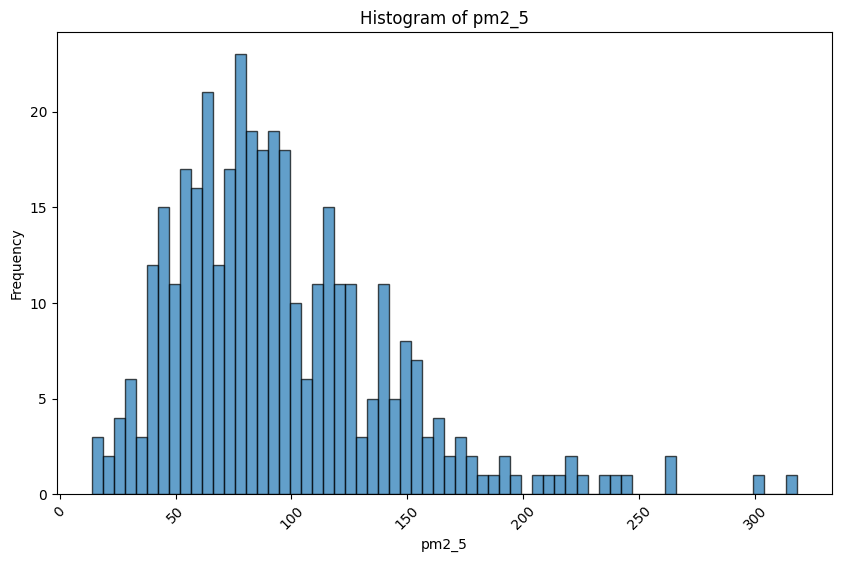

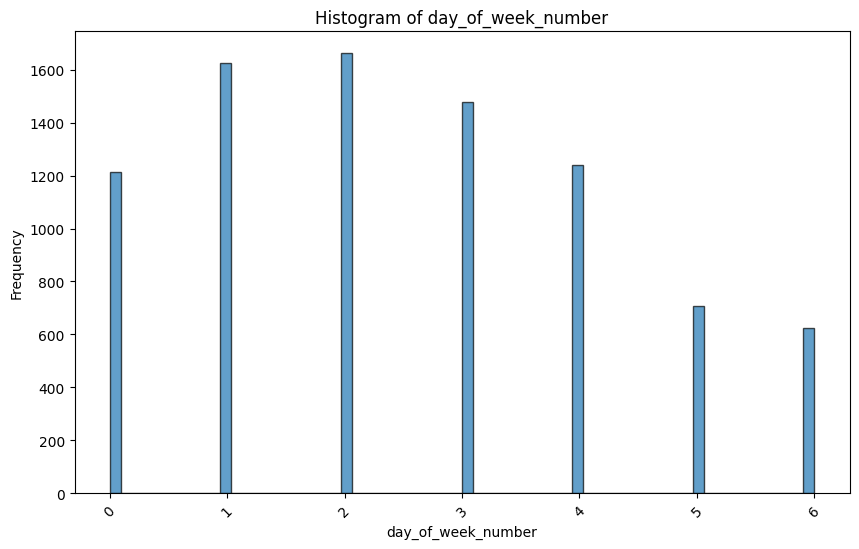

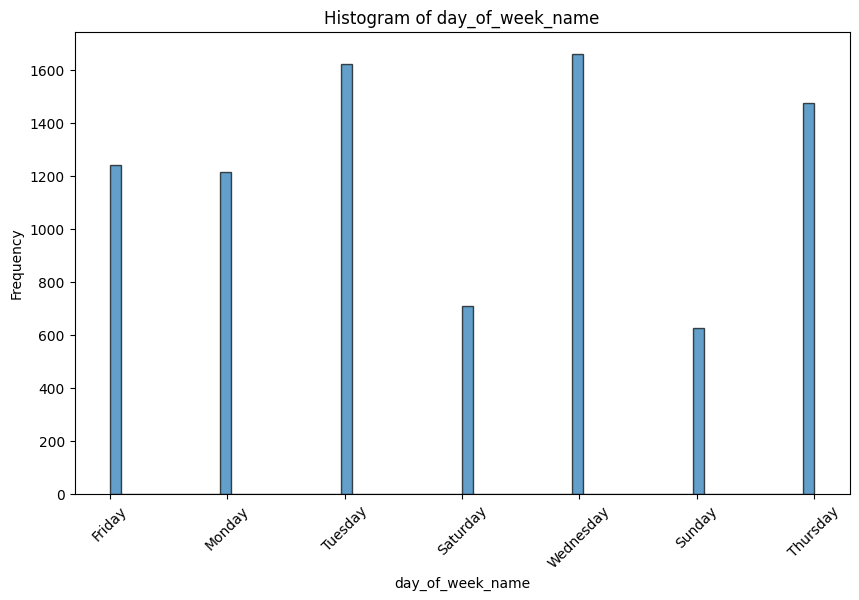

In [42]:
# Histogram
number_of_bins = 64
for col in selected_columns:
    plt.figure(figsize=(10,6))
    selected_columns[col].hist(bins=number_of_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [7]:
df_melted = selected_columns.melt(id_vars=['location'], value_vars=['no2', 'so2', 'pm2_5','rspm','spm'],var_name='pollutant_type', value_name='level')

In [43]:
# boxplot
def plot_data(pollutant):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='location', y=pollutant, data=selected_columns)
    plt.title(f'Levels of {pollutant} by location')
    plt.ylabel('Level')
    plt.xlabel('location')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

pollutants = ['no2', 'so2', 'pm2_5','rspm','spm']
widgets.interactive(plot_data, pollutant=pollutants)

interactive(children=(Dropdown(description='pollutant', options=('no2', 'so2', 'pm2_5', 'rspm', 'spm'), value=…

In [ ]:
def plot_data(x_pollutant, y_pollutant):
    plt.figure(figsize=(10,6))

    # Using scatterplot
    sns.scatterplot(x=selected_columns[x_pollutant], y=selected_columns[y_pollutant], s=100)

    plt.title(f'Scatter plot of {x_pollutant} vs {y_pollutant}')
    plt.ylabel(y_pollutant)
    plt.xlabel(x_pollutant)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a dropdown with pollutants and display the interactive plot
pollutants = ['no2', 'so2', 'pm2_5','rspm','spm']
widgets.interactive(plot_data, x_pollutant=pollutants, y_pollutant=pollutants)

interactive(children=(Dropdown(description='x_pollutant', options=('no2', 'so2', 'pm2_5', 'rspm', 'spm'), valu…

<ipython-input-8-f727e53371a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


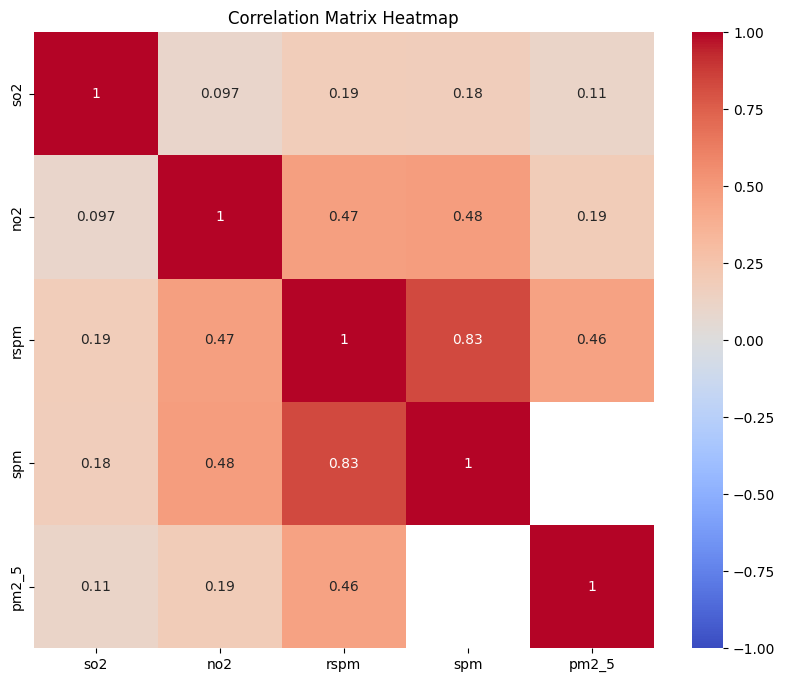

In [8]:
df = selected_columns.drop('location', axis=1)
# Calculate the correlation matrix
corr_matrix = df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
selected_columns_filtered = selected_columns.dropna(subset=['stn_code'])

In [10]:
selected_columns_filtered.isnull().sum()

stn_code            0
date                0
sampling_date       0
state               0
location            0
so2               518
no2               515
rspm             1670
spm              2985
pm2_5            4875
dtype: int64

In [11]:
selected_columns_filtered['pm25'] = selected_columns_filtered['pm2_5']
grouped_mean = selected_columns_filtered.groupby('stn_code')['pm2_5'].transform('mean')
selected_columns_filtered['pm25'].fillna(grouped_mean, inplace=True)


<ipython-input-11-73745e57bf60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_filtered['pm25'] = selected_columns_filtered['pm2_5']
<ipython-input-11-73745e57bf60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_filtered['pm25'].fillna(grouped_mean, inplace=True)


In [12]:
# Print out a count of missing data for each column in the dataset
selected_columns_filtered.isnull().sum()

stn_code            0
date                0
sampling_date       0
state               0
location            0
so2               518
no2               515
rspm             1670
spm              2985
pm2_5            4875
pm25             2359
dtype: int64

In [13]:
actual_values = selected_columns_filtered['pm2_5']
actual_values = actual_values.fillna(0)
predicted_values = selected_columns_filtered['pm25']
predicted_values = predicted_values.fillna(0)
# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 45.102446193107866


In [14]:
selected_columns['date'] = pd.to_datetime(selected_columns['date'])
selected_columns['day_of_week_number'] = selected_columns['date'].dt.dayofweek
selected_columns['day_of_week_name'] = selected_columns['date'].dt.day_name()

In [15]:
one_hot = pd.get_dummies(selected_columns.stn_code, prefix='Station')
raw_data_for_imputing = selected_columns.join(one_hot)
target ='pm2_5'

data_no_missing = raw_data_for_imputing.copy()
# Drop all rows containing missing values
data_no_missing.dropna(subset=[target],inplace=True)
# Print out the number of missing values in the PM2.5 column as a check (should print 0)
null_remaining = data_no_missing[target].isnull().sum()
if null_remaining == 0:
    print('missing values removed and data prepared successfully!')


from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_no_missing, test_size=0.20, random_state=57)

print(f'Train dataset size: {train_data.shape}')
print(f'Test dataset size: {test_data.shape}')

pollutants_list = ['so2','no2','rspm']
pollutants_except_target = [i for i in pollutants_list if i != target]
feature_names = ['day_of_week_number'] + list(one_hot.columns) + pollutants_except_target

missing values removed and data prepared successfully!
Train dataset size: (296, 23)
Test dataset size: (75, 23)


In [23]:
def build_keras_model(input_size: int) -> tf.keras.Model:
    '''Build a neural network with three fully connected layers (sizes: 64, 32, 1)

    Args:
        input_size (int): The size of the input

    Returns:
        model (tf.keras.Model): The neural network
    '''
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[input_size]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.007)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

    return model

def train_and_test_model(
    feature_names: List[str],
    target: str,
    train_df: pd.core.frame.DataFrame,
    test_df: pd.core.frame.DataFrame,
    model: tf.keras.Model,
    number_epochs: int=100
) -> Tuple[tf.keras.Model, StandardScaler, Dict[str, float]]:
    '''
    This function will take the features (x), the target (y) and the model and will fit
    and Evaluate the model.

    Args:
        feature_names (List[str]): Names of feature columns
        target (str): Name of the target column
        train_df (pd.core.frame.DataFrame): Dataframe with training data
        test_df (pd.core.frame.DataFrame): Dataframe with test data
        model (tf.keras.Model): Model to be fit to the data
        number_epochs (int): Number of epochs

    Returns:
        model (tf.keras.Model): Fitted model
        scaler (StandardScaler): scaler
        MAE (Dict[str, float]): Dictionary containing mean absolute error.
    '''
    scaler = StandardScaler()

    X_train = train_df[feature_names]
    y_train = train_df[target]
    X_test = test_df[feature_names]
    y_test = test_df[target]

    # Handle missing values in the DataFrames (You can choose an appropriate method)
    X_train = X_train.fillna(X_train.mean())  # Filling with the mean
    X_test = X_test.fillna(X_test.mean())

    # Fit the scaler to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Build and train the model
    model.fit(X_train, y_train, batch_size=64, epochs=number_epochs)
    y_pred = model.predict(X_test)
    MAE = {"MAE": mean_absolute_error(y_pred, y_test)}
    return model, scaler, MAE


In [ ]:
# Assuming you have defined feature_names and target appropriately

# Define the neural network model architecture
model = build_keras_model(input_size=len(feature_names))

# Train and test the model
model, scaler, mae = train_and_test_model(feature_names, target, train_data, test_data, model)
regression_scores['neural_network_model'] = mae

In [ ]:
for model_name, model_score in regression_scores.items():
    print(model_name, ' : ', model_score)

neural_network_model  :  {'MAE': 31.30235555013021}


To better understand whether the values are acceptable or not, you can consider the following:

Baseline Models: Compare your model's performance with simple baseline models like predicting the mean, median, or a constant value. If your model performs significantly better than these baselines, it indicates that it's capturing some meaningful patterns.
Domain Knowledge: Consider the context of your problem and whether the obtained MAE aligns with your expectations. For certain applications, an MAE of 28.1531 might be considered acceptable, while for others, it might be too high.
Comparing with Literature or Benchmarks: Check whether there are any existing benchmarks or literature results for similar problems. Comparing your model's performance with these benchmarks can provide insights into its relative performance.
Cross-Validation: Perform cross-validation to assess the model's generalization ability. If the MAE consistently stays high across different folds, it might indicate that the model is not capturing essential patterns in the data.
In summary, whether the loss and MAE values are too high or acceptable depends on the specific problem, the scale of the target variable, and the context of the application. It's crucial to interpret the results in the context of the problem and make an informed judgment based on the above considerations.

In [32]:
X = data_no_missing[["pm2_5"]]
y = data_no_missing[['so2','no2','rspm']]

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [41]:
kmin = 1
kmax = 7
results = {}

# Fill NaN values outside of loop
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

for kneighbors in range(kmin, kmax+1):
    clf = KNeighborsRegressor(n_neighbors=kneighbors)

    # Using cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    avg_mae = -np.mean(scores)

    results[kneighbors] = avg_mae
    print(f"k={kneighbors}: Avg MAE = {avg_mae}")

# If you want to get the best k value:
best_k = min(results, key=results.get)
print(f"Best k is {best_k} with MAE = {results[best_k]}")


k=1: Avg MAE = 30.007792860734035
k=2: Avg MAE = 26.537682252388134
k=3: Avg MAE = 25.882051282051286
k=4: Avg MAE = 24.400773001508295
k=5: Avg MAE = 24.079220713926595
k=6: Avg MAE = 24.005023462376407
k=7: Avg MAE = 23.78930187459599
Best k is 7 with MAE = 23.78930187459599


# To Do:
Find lat,long based on location or stn
Test different values of k for the nearest neighbor method
Use the best value of k to make a map of PM2.5 in India/any city in India
Construct a map animation of PM2.5
Display your map animation


#How?
# Define a value for k
k = 3
# Define the target pollutant
target = 'PM2.5'
# Define a grid cell size (higher value implies a finer grid)
n_points_grid = 64
neighbors_model = KNeighborsRegressor(n_neighbors=k, weights = 'distance', metric='sqeuclidean')
# Isolate a single time step from the dataset
time_step = datetime.fromisoformat('2021-04-05T08:00:00')
time_step_data = full_dataset[full_dataset['DateTime'] == time_step]
neighbors_model.fit(time_step_data[['Latitude', 'Longitude']], time_step_data[[target]])
# Generate a map of predictions for Bogotá
predictions_xy, dlat, dlon = utils.predict_on_bogota(neighbors_model, n_points_grid)
utils.create_heat_map(predictions_xy, time_step_data, dlat, dlon, target)